### ## Analisis Clustering

1. **Sumber Dataset**:  
   Dataset diperoleh dari Website BPS Kabupaten Blitar.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**
   - **Jumlah Baris**: 38 baris dan 6 kolom.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Kota.
     - *Numerikal*: umur harapan hidup saat lahir (tahun), harapan lama sekolah, rata-rata lama sekolah, pengeluaran riil perkapita pertahun yang disesuaikan, IPM.

3. **Latar Belakang**:  
Dataset ini dipilih karena menyajikan data real-time yang memungkinkan untuk dijadikan studi kasus dalam menganalisis dan mengelompokkan kota/kabupaten di Provinsi Jawa Timur berdasarkan tingkat kemajuannya pada tahun 2024.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_val_predict

# Data Loading

In [2]:
# Membaca Datset dari file csv dan menampilkan 5 baris pertama
df = pd.read_csv('Indeks Pembangunan Manusia (IPM) tahun 2024.csv')
df.head()

,kota,umur harapan hidup saat lahir (tahun),harapan lama sekolah,rata-rata lama sekolah,pengeluaran riil perkapita pertahun yang disesuaikan,IPM
0,pacitan,74.74,12.69,7.90,10.099,71.49
1,ponorogo,75.28,13.78,7.80,11.065,73.70
2,trenggalek,75.35,12.63,7.92,10.872,72.47
3,tulungagung,75.20,13.36,8.68,11.966,75.13
4,blitar,75.32,12.67,7.87,12.020,73.44


In [ ]:
#Menampilan informasi mengenai dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   kota                                                  38 non-null     object 
 1   umur harapan hidup saat lahir (tahun)                 38 non-null     float64
 2   harapan lama sekolah                                  38 non-null     float64
 3   rata-rata lama sekolah                                38 non-null     float64
 4   pengeluaran riil perkapita pertahun yang disesuaikan  38 non-null     float64
 5   IPM                                                   38 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.9+ KB


In [ ]:
#Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,umur harapan hidup saat lahir (tahun),harapan lama sekolah,rata-rata lama sekolah,pengeluaran riil perkapita pertahun yang disesuaikan,IPM
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,74.804474,13.581316,8.463947,12.733000,75.310000
std,0.743017,0.902394,1.703252,2.299499,4.758721
min,73.310000,11.980000,5.080000,9.782000,66.720000
25%,74.352500,12.915000,7.477500,11.193500,71.695000
50%,74.930000,13.495000,8.060000,12.401000,74.555000
75%,75.335000,14.017500,9.832500,13.844750,78.622500
max,76.020000,15.790000,12.110000,19.666000,84.690000


Berdasarkan data diatas terdapat:
1. Indeks Pembangunan Manusia (IPM) Rata-rata
- Rata-rata IPM dari 38 kota/kabupaten adalah 75,31 dengan standar deviasi 4,76.
- Kota/kabupaten dengan IPM terendah memiliki nilai 66,72, sedangkan yang tertinggi mencapai 84,69.
- Sebagian besar daerah memiliki IPM di sekitar 74,56 (median), menunjukkan tingkat pembangunan manusia yang cukup baik tetapi ada kesenjangan antar daerah.
2. Umur Harapan Hidup (UHH)
- Rata-rata umur harapan hidup saat lahir adalah 74,80 tahun, dengan rentang antara 73,31 hingga 76,02 tahun.
- Variasi UHH cukup kecil, menunjukkan bahwa faktor kesehatan relatif merata di seluruh daerah.
3. Harapan Lama Sekolah & Rata-rata Lama Sekolah
- Rata-rata harapan lama sekolah adalah 13,58 tahun, dengan variasi antara 11,98 hingga 15,79 tahun.
- Rata-rata lama sekolah (realitas) hanya 8,46 tahun, dengan minimum 5,08 tahun dan maksimum 12,11 tahun, menunjukkan masih ada daerah dengan akses pendidikan yang rendah.
4. Pengeluaran Riil Per Kapita
- Rata-rata pengeluaran per kapita per tahun yang disesuaikan adalah 12,73 juta rupiah, dengan variasi antara 9,78 juta hingga 19,66 juta rupiah.



# Exploratory Data Analysis

In [3]:
# Melihat jumlah missing value per kolom
print(df.isnull().sum())

kota                                                    0
umur harapan hidup saat lahir (tahun)                   0
harapan lama sekolah                                    0
rata-rata lama sekolah                                  0
pengeluaran riil perkapita pertahun yang disesuaikan    0
IPM                                                     0
dtype: int64


In [4]:
# # Cara Handling Missing Value (jika ada Missing Value nya, berhubung aku tidak ada maka bisa diskip)
#  a. Jika ingin mengisi dengan nilai rata-rata (numerik)
# df['IPM'] = df['IPM'].fillna(df['IPM'].mean())
# df['Harapan_Lama_Sekolah'] = df['Harapan_Lama_Sekolah'].fillna(df['Harapan_Lama_Sekolah'].mean())
#  b. Jika ingin menghapus baris yang ada missing value-nya
# df = df.dropna()

Berhubung tidak ada Missing Value nya, maka bisa diskip ke tahap selanjutnya

In [5]:
# Menampilkan jumlah data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


In [6]:
# # Menghapus baris yang duplikat (jika ada duplikatnya, berhubung aku tidak ada maka bisa diskip)
# df = df.drop_duplicates()

Berhubung tidak ada Data duplikat nya, maka bisa diskip ke tahap selanjutnya

## Binning Data

In [ ]:
df["RLS"] = df["rata-rata lama sekolah"]
df["HLS"] = df["harapan lama sekolah"]

#Mengelompokkan rata-rata lama sekolah (RLS) ke dalam kategori
RLS5_7 = df.RLS[(df.RLS >= 5) & (df.RLS < 7)]
RLS7_9 =df.RLS[(df.RLS >= 7) & (df.RLS < 9)]
RLS9_11 =df.RLS[(df.RLS >= 9) & (df.RLS < 11)]
RLS11_13 =df.RLS[(df.RLS >= 11) & (df.RLS < 13)]

#Menyusun data untuk plotting
x = ["5-7", "7-9", "9-11", "11-13"]
y = [len(RLS5_7.values), len(RLS7_9.values), len(RLS9_11.values), len(RLS11_13.values)]

# Mengelompokkan Harapan Lama Sekolah (HLS) Ke Dalam Kategori
HLS11_12 = df["HLS"][(df["HLS"] >= 11) & (df["HLS"] < 12)]
HLS12_13 = df["HLS"][(df["HLS"] >= 12) & (df["HLS"] < 13)]
HLS13_14 = df["HLS"][(df["HLS"] >= 13) & (df["HLS"] < 14)]
HLS14above = df["HLS"][(df["HLS"] >= 14)]

#Menyusun data untuk plotting
HLSx = ["$ 11 - 11,999$", "$ 12 - 12,999$", "$ 13 - 13,999$", "$ 14,000 - $"]
HLSy = [len(HLS11_12.values), len(HLS12_13.values), len(HLS13_14.values), len(HLS14above.values)]

# Visualisasi Data Rata-rata Lama Sekolah dan Harapan Lama Sekolah

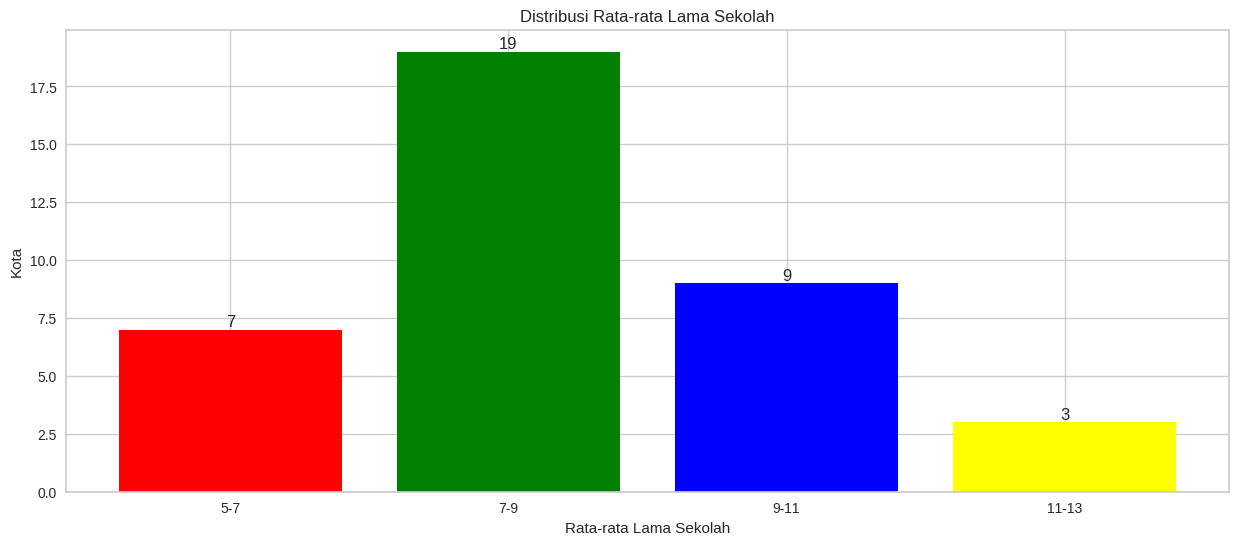

In [ ]:
#Membuat Bar chart untuk distribusi RLS
plt.figure(figsize=(15,6))
plt.bar(x, y, color=['red', 'green', 'blue', 'yellow'])
plt.title("Distribusi Rata-rata Lama Sekolah")
plt.xlabel("Rata-rata Lama Sekolah")
plt.ylabel("Kota")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

Pada grafik diatas, bisa disimpulkan bahwa
* Dengan rata-rata lama sekolah 5-7 tahun, ada sebanyak 7 kota/kabupaten pada jawa timur
* Dengan rata-rata lama sekolah 7-9 tahun, ada sebanyak 19 kota/kabupaten pada jawa timur
* Dengan rata-rata lama sekolah 9-11 tahun, ada sebanyak 9 kota/kabupaten pada jawa timur
* Dengan rata-rata lama sekolah 11-13 tahun, ada sebanyak 3 kota/kabupaten pada jawa timur



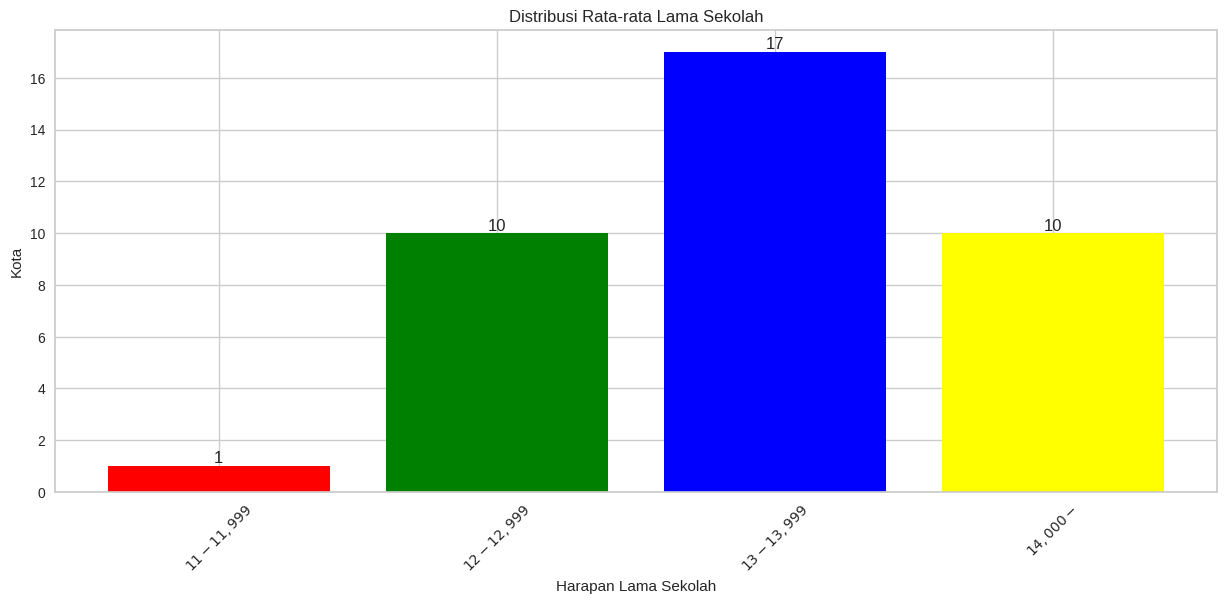

In [ ]:
#Membuat Bar chart untuk distribusi HLS
plt.figure(figsize=(15,6))
plt.bar(HLSx, HLSy, color=['red', 'green', 'blue', 'yellow'])
plt.title("Distribusi Rata-rata Lama Sekolah")
plt.xlabel("Harapan Lama Sekolah")
plt.ylabel("Kota")
plt.xticks(rotation=45)

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(HLSx)):
    plt.text(i, HLSy[i], HLSy[i], ha='center', va='bottom')

plt.show()

Pada grafik diatas, bisa disimpulkan bahwa
* Dengan harapan lama sekolah 11-11,9 tahun, ada sebanyak 1 kota/kabupaten pada jawa timur
* Dengan harapan lama sekolah 12-12,9 tahun, ada sebanyak 10 kota/kabupaten pada jawa timur
* Dengan harapan lama sekolah 13-13,9 tahun, ada sebanyak 17 kota/kabupaten pada jawa timur
* Dengan harapan lama sekolah 14+ tahun, ada sebanyak 10 kota/kabupaten pada jawa timur



# Data Splitting

In [ ]:
#Mengambil kolom 'Kota' dan 'IPM' dari dataset dan menyimpannya dalam array X
X =df.iloc[:, [0, 5]].values

#Menampilkan data yang diambil dalam format dataframe dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Kota', 'IPM']))

                Kota    IPM
0            pacitan  71.49
1           ponorogo   73.7
2         trenggalek  72.47
3        tulungagung  75.13
4             blitar  73.44
5             kediri  75.18
6             malang  73.53
7           lumajang  70.31
8             jember  70.91
9         banyuwangi   74.3
10         bondowoso  71.22
11         situbondo  71.22
12       probolinggo  70.85
13          pasuruan  72.36
14          sidoarjo  82.67
15         mojokerto  76.69
16           jombang  75.67
17           nganjuk  75.24
18            madiun  74.81
19           magetan  76.77
20             ngawi  73.91
21        bojonegoro  72.75
22             tuban  72.31
23          lamongan   75.9
24            gresik  78.93
25         bangkalan  67.33
26           sampang  66.72
27         pamekasan  70.85
28           sumenep  69.78
29       kota_kediri  81.88
30       kota_blitar  81.44
31       kota_malang  84.68
32  kota_probolinggo  77.79
33     kota_pasuruan   78.9
34    kota_mojokerto

In [ ]:
# Misal data awal (pastikan df sudah didefinisikan sebelumnya)
X = df.iloc[:, [0, 5]].values

# Label Encoding pada kolom 'Kota'
label_encoder = LabelEncoder()

# Ambil kolom 'Kota' dan encode
kota_encoded = label_encoder.fit_transform(X[:, 0])

# Gantikan kolom 'Kota' yang asli dengan hasil encoding
X[:, 0] = kota_encoded

# Buat DataFrame baru
Xbaru = pd.DataFrame(X, columns=['Kota', 'IPM'])

# Tampilkan hasil
print(Xbaru)


   Kota    IPM
0    26  71.49
1    29   73.7
2    35  72.47
3    37  75.13
4     2  73.44
5     8  75.18
6    22  73.53
7    19  70.31
8     6  70.91
9     1   74.3
10    4  71.22
11   33  71.22
12   30  70.85
13   28  72.36
14   32  82.67
15   23  76.69
16    7  75.67
17   24  75.24
18   20  74.81
19   21  76.77
20   25  73.91
21    3  72.75
22   36  72.31
23   18   75.9
24    5  78.93
25    0  67.33
26   31  66.72
27   27  70.85
28   34  69.78
29   11  81.88
30   10  81.44
31   13  84.68
32   16  77.79
33   15   78.9
34   14  81.76
35   12  84.51
36   17  84.69
37    9  79.69


Keterangan Kota Encoded
0. Bangkalan
1. Banyuwangi
2. Blitar
3. Bojonegoro
4. Bondowoso
5. Gresik
6. Jember
7. Jombang
8. Kediri
9. Kota_Batu
10. Kota_Blitar
11. Kota_Kediri
12. Kota_Madiun
13. Kota_Malang
14. Kota_Mojokerto
15. Kota_Pasuruan
16. Kota_Probolinggo
17. Kota_Surabaya
18. Lamongan
19. Lumajang
20. Madiun
21. Magetan
22. Malang
23. Mojokerto
24. Nganjuk
25. Ngawi
26. Pacitan
27. Pamekasan
28. Pasuruan
29. Ponorogo
30. Probolinggo
31. Sampang
32. Sidoarjo
33. Situbondo
34. Sumenep
35. Trenggalek
36. Tuban
37. Tulungagung


# Elbow Method

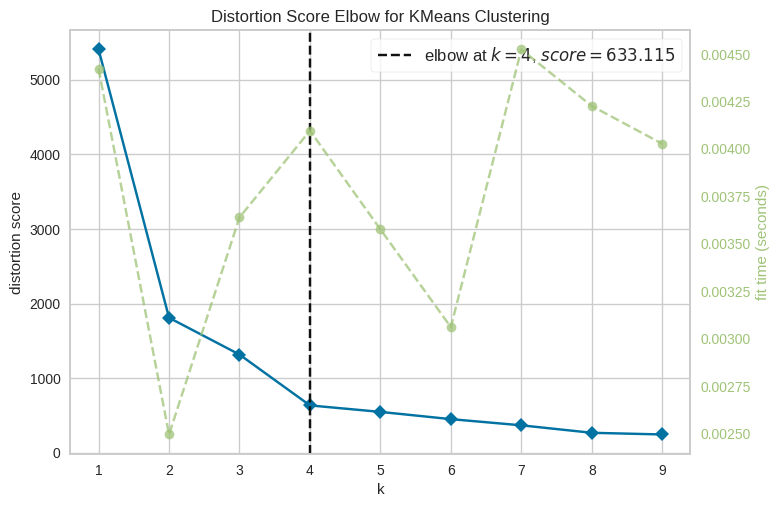

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(Xbaru)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

Menggunakan Elbow Method untuk menentukan jumlah cluster optimal, yaitu sebanyak 4

# Cluster Modeling (K-Means Clustering)

Menggunakan Algoritma KMeans, karena kemampuannya untuk melakukan pengelompokan (clustering) pada data tanpa label yang sebagian besar terdiri dari fitur numerik, dengan tujuan untuk mengidentifikasi kelompok-kelompok kota/kabupaten yang mungkin mencerminkan tingkat kemajuan yang berbeda.

In [ ]:
k = 4
#Inisialisasi dan melatih model KMeans dengan jumlah cluster = '4'
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(Xbaru)

KMeans(n_clusters=4, random_state=0)

In [ ]:
# Mendapatkan label cluster
labels = kmeans.labels_

# Fungsi untuk analisis karakteristik cluster
def analyze_cluster(Xbaru, labels, k):
  print("Analisis Karakteristik Cluster:")
  for cluster_id in range(k):
    # Mengambil data untuk cluster saat ini
    cluster_data = Xbaru[labels == cluster_id]

    # Menghitung rata-rata untuk setiap fitur dalam cluster
    mean_kota = cluster_data['Kota'].mean()
    mean_ipm = cluster_data['IPM'].mean()

    print(f"\nCluster {cluster_id + 1}:")
    print(f"Rata-rata Kota: {mean_kota:.2f}")
    print(f"Rata-rata IPM: {mean_ipm:.2f}")

#Analisis karakteristik setiap cluster
analyze_cluster(Xbaru, labels, k)

Analisis Karakteristik Cluster:

Cluster 1:
Rata-rata Kota: 24.15
Rata-rata IPM: 74.48

Cluster 2:
Rata-rata Kota: 4.00
Rata-rata IPM: 73.30

Cluster 3:
Rata-rata Kota: 33.71
Rata-rata IPM: 71.21

Cluster 4:
Rata-rata Kota: 13.00
Rata-rata IPM: 81.70


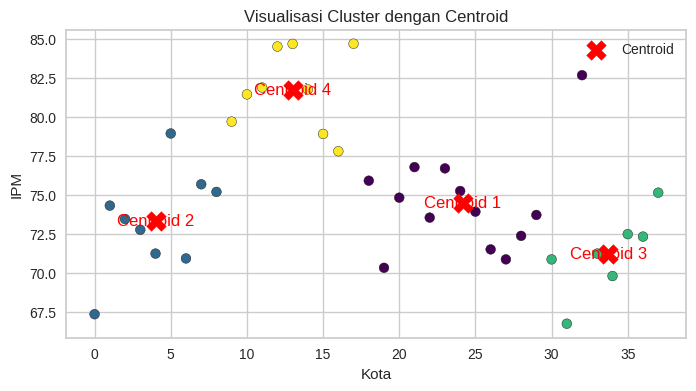

Nilai Centroid:
Centroid 1: Kota = 24.15, IPM = 74.48
Centroid 2: Kota = 4.00, IPM = 73.30
Centroid 3: Kota = 33.71, IPM = 71.21
Centroid 4: Kota = 13.00, IPM = 81.70


In [ ]:
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(8, 4))

# Plot data
# Use .iloc for integer-based indexing on the DataFrame
plt.scatter(Xbaru.iloc[:, 0], Xbaru.iloc[:, 1], c=labels, cmap='viridis', edgecolor='k')

# Plot Centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroid')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i + 1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Kota')
plt.ylabel('IPM')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroid:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i + 1}: Kota = {centroid[0]:.2f}, IPM = {centroid[1]:.2f}")

Kesimpulan Hasil Clustering:
1. Model K-Means berhasil mengelompokkan 38 kota/kabupaten menjadi 4 klaster, berdasarkan dua variabel utama: Kota (encoded) dan IPM (Indeks Pembangunan Manusia).

2. Setiap klaster memiliki karakteristik berbeda, ditandai dengan nilai rata-rata IPM dan posisi relatif terhadap indeks Kota (encoded):

- Cluster 1 (Centroid 1: Kota = 24.15, IPM = 74.48)
→ Kota/kabupaten dengan IPM cukup baik, tersebar di sekitar indeks kota menengah.

- Cluster 2 (Centroid 2: Kota = 4.00, IPM = 73.30)
→ Didominasi kota/kabupaten dengan kode awal (bagian barat atau utara Jawa Timur) yang memiliki IPM menengah ke bawah.

- Cluster 3 (Centroid 3: Kota = 33.71, IPM = 71.21)
→ Merupakan klaster dengan IPM paling rendah, terletak di kota/kabupaten berindeks besar (wilayah timur atau pesisir).

- Cluster 4 (Centroid 4: Kota = 13.00, IPM = 81.70)
→ Klaster dengan IPM tertinggi, sebagian besar kota/kabupaten dalam klaster ini berada di tengah-tengah indeks kota, kemungkinan mencakup kota-kota besar dan wilayah urban seperti Surabaya, Malang, atau Batu.

3. Distribusi IPM antar klaster menunjukkan kesenjangan pembangunan manusia antar wilayah, yang bisa dijadikan dasar untuk evaluasi kebijakan daerah dalam rangka meningkatkan pemerataan pembangunan.

4. Clustering ini memberikan gambaran segmentasi wilayah berdasarkan kualitas hidup (IPM), dan dapat digunakan sebagai acuan dalam pengambilan keputusan oleh pemangku kebijakan, seperti penentuan prioritas intervensi pembangunan di kota/kabupaten dengan IPM rendah.

In [ ]:
# Tambahkan kolom 'Cluster' ke dataset
Xbaru['Cluster'] = kmeans.labels_

# Tampilkan hasil dataset yang sudah ditambahkan cluster
Xbaru

,Kota,IPM,Cluster
0,26,71.49,0
1,29,73.7,0
2,35,72.47,2
3,37,75.13,2
4,2,73.44,1
5,8,75.18,1
6,22,73.53,0
7,19,70.31,0
8,6,70.91,1
9,1,74.3,1


# **## Analisis Klasifikasi**

In [ ]:
# Memilih fitur yang ingin dinormalisasi/standarisasi
features = Xbaru[['Kota', 'IPM', 'Cluster']]

# Normalisasi dengan Min-Max Scaler
min_max_scaler = MinMaxScaler()
normalized_features = min_max_scaler.fit_transform(features)

# Standarisasi dengan Standard Scaler
standard_scaler = StandardScaler()
standardized_features = standard_scaler.fit_transform(features)

# Menampilkan hasil
normalized_df = pd.DataFrame(normalized_features, columns=['Kota', 'IPM', 'Cluster'])
standardized_df = pd.DataFrame(standardized_features, columns=['Kota', 'IPM', 'Cluster'])
print("Normalized Features:\n", normalized_df.head())
print("Standardized Features:\n", standardized_df.head())

Normalized Features:
        Kota       IPM   Cluster
0  0.702703  0.265442  0.000000
1  0.783784  0.388425  0.000000
2  0.945946  0.319978  0.666667
3  1.000000  0.468002  0.666667
4  0.054054  0.373957  0.333333
Standardized Features:
        Kota       IPM   Cluster
0  0.683941 -0.813512 -1.122533
1  0.957518 -0.342868 -1.122533
2  1.504670 -0.604810  0.583717
3  1.687055 -0.038333  0.583717
4 -1.504670 -0.398238 -0.269408


In [ ]:
# Memilih fitur dan target
xfeatures = normalized_df.drop(columns=['Cluster'])
ytarget = Xbaru['Cluster']

# Membagi data menjadi data latih dan data uji (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(xfeatures, ytarget, test_size=0.2, random_state=42)

# Menampilkan ukuran data
print("Ukuran Data Train:", X_train.shape)
print("Ukuran Data Test:", X_test.shape)

Ukuran Data Train: (30, 2)
Ukuran Data Test: (8, 2)


# Modeling

In [ ]:
# Definisikan setiap klasifikasi secara terpisah
#rf = RandomForestClassifier().fit(X_train, y_train)

# Inisialisasi model Random Forest
#model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
#model.fit(X_train, y_train)

In [ ]:
# Inisialisasi stratified k-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi model menggunakan cross_val_score (mengukur akurasi)
scores = cross_val_score(model, xfeatures, ytarget, cv=skf, scoring='accuracy')

# Menampilkan hasil
print("Akurasi tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))

Akurasi tiap fold: [0.875      0.75       1.         0.85714286 0.85714286]
Rata-rata akurasi: 0.8678571428571429


Menggunakan StratifiedKFold, cara ini digunakan karena untuk menjaga proporsi kelas yang seimbang di setiap fold, sehingga evaluasi model menjadi lebih adil. Metode ini membantu mencegah overfitting dan menghasilkan akurasi yang lebih stabil. Selain itu, sangat cocok diterapkan pada dataset berukuran kecil untuk memaksimalkan penggunaan data.

# Evaluation


=== Fold 1 ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       0.67      1.00      0.80         2

    accuracy                           0.88         8
   macro avg       0.92      0.92      0.90         8
weighted avg       0.92      0.88      0.88         8



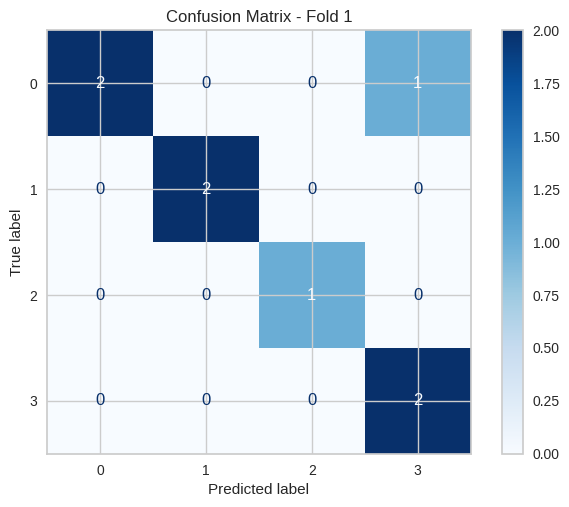


=== Fold 2 ===
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       1.00      0.50      0.67         2

    accuracy                           0.75         8
   macro avg       0.65      0.62      0.60         8
weighted avg       0.72      0.75      0.70         8



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


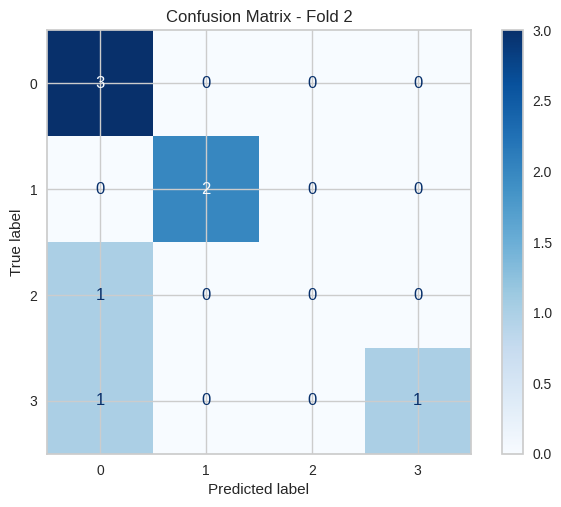


=== Fold 3 ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



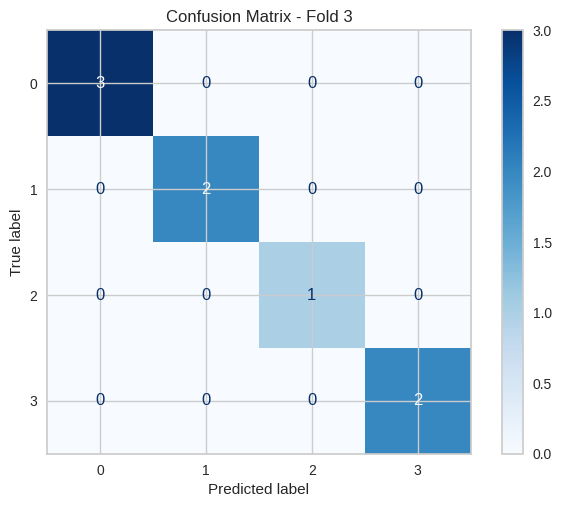


=== Fold 4 ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       0.50      1.00      0.67         1

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.83         7
weighted avg       0.93      0.86      0.86         7



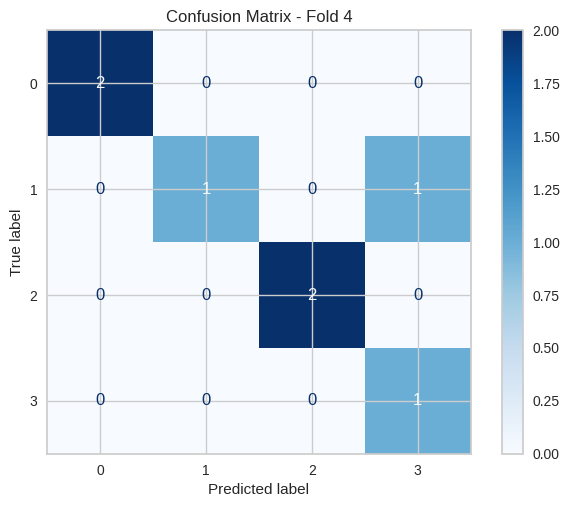


=== Fold 5 ===
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2

    accuracy                           0.86         7
   macro avg       0.92      0.88      0.87         7
weighted avg       0.90      0.86      0.85         7



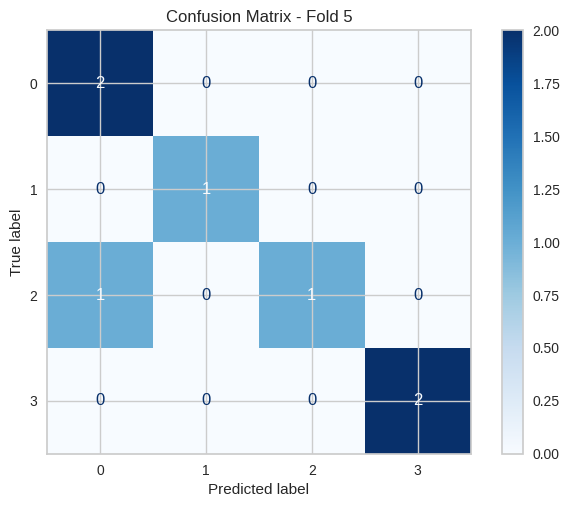


Akurasi tiap fold: [0.875, 0.75, 1.0, 0.8571428571428571, 0.8571428571428571]
Rata-rata akurasi: 0.8678571428571429


In [ ]:
# Variabel untuk menyimpan hasil akurasi setiap fold
fold = 1
accuracies = []

for train_index, test_index in skf.split(xfeatures, ytarget):
    X_train, X_test = xfeatures.iloc[train_index], xfeatures.iloc[test_index]
    y_train, y_test = ytarget.iloc[train_index], ytarget.iloc[test_index]

    # Latih model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluasi model
    print(f"\n=== Fold {fold} ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.show()

    # Simpan akurasi
    acc = model.score(X_test, y_test)
    accuracies.append(acc)
    fold += 1

# Rata-rata akurasi
print("\nAkurasi tiap fold:", accuracies)
print("Rata-rata akurasi:", np.mean(accuracies))

Kesimpulan Hasil Klasifikasi:


*   Model menunjukkan performa yang baik dan cukup stabil, dengan nilai akurasi rata-rata sebesar 86,79% berdasarkan lima kali validasi silang menggunakan Stratified K-Fold.
*   Tingkat akurasi pada setiap fold bervariasi, dengan nilai tertinggi sebesar 100% dan terendah sebesar 75%. Variasi ini masih dalam batas wajar, terutama mengingat jumlah data yang relatif kecil.
*   Model tidak mengalami overfitting secara signifikan, karena terdapat beberapa kesalahan prediksi pada beberapa fold, yang menandakan bahwa model tidak hanya menghafal data pelatihan, tetapi juga mampu melakukan generalisasi.
*   Model layak digunakan untuk pemodelan awal, namun disarankan untuk melakukan pengujian lanjutan atau menambah jumlah data agar hasil evaluasi lebih representatif dan dapat diandalkan untuk implementasi pada skenario nyata.












# Kesimpulan Akhir
Berdasarkan hasil analisis clustering dan klasifikasi terhadap data Indeks Pembangunan Manusia (IPM) 38 kota/kabupaten, dapat disimpulkan bahwa:

1. Proses clustering dengan metode K-Means berhasil mengelompokkan wilayah ke dalam empat klaster yang berbeda, masing-masing memiliki karakteristik IPM yang khas. Hal ini menunjukkan adanya variasi tingkat pembangunan manusia di berbagai daerah yang dapat dijadikan dasar untuk analisis segmentasi wilayah dan penyusunan kebijakan pembangunan yang lebih tepat sasaran.

2. Terdapat kesenjangan IPM antar klaster, di mana klaster dengan nilai IPM tinggi cenderung mencakup wilayah perkotaan atau pusat ekonomi, sementara klaster dengan IPM rendah banyak ditempati oleh wilayah pinggiran atau pesisir. Hasil ini menunjukkan perlunya pemerataan pembangunan agar tidak terjadi ketimpangan antardaerah.

3. Model klasifikasi yang diterapkan menunjukkan performa yang baik dan stabil, dengan rata-rata akurasi sebesar 86,79% berdasarkan evaluasi cross-validation. Hal ini mengindikasikan bahwa model mampu mempelajari pola dari data dengan cukup baik dan melakukan prediksi yang akurat.

4. Meski akurasi model tinggi, masih ditemukan variasi antar fold, sehingga perlu dilakukan pengujian lanjutan dan penambahan data untuk memastikan keandalan model pada implementasi nyata. Secara keseluruhan, model layak dijadikan sebagai baseline dalam analisis data IPM maupun prediksi klaster wilayah berdasarkan indikator pembangunan.

Berikut merupakan Link PPT/Portofolionya:

https://drive.google.com/file/d/1f3GkRmXYxpcSUiYdpVbn2XbRbfiD8W91/view?usp=sharing